<a href="https://colab.research.google.com/github/kwon0136/Python/blob/master/190226/review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## CCTV
import pandas as pd
import numpy as np

cctv_seoul = pd.read_csv("../Data/CCTV_Seoul.csv", encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [0]:
cctv_seoul.columns # title 명
cctv_seoul.columns[0]

# rename --> column명 변경 // inplace=True --> 원본 데이터 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True) 

In [0]:
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [0]:
# header --> 상위 row2줄 제외 // usecolumns --> 불러 올 column 설정
pop_seoul = pd.read_excel("../Data/population_Seoul.xls", encoding='utf-8', header=2, usecols='B,D,G,J,N')
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [0]:
# rename --> 자치구->구별, 계->인구, 계.1 ->한국인, 계.2->외국인, 65세->고령자
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별', pop_seoul.columns[1]:'인구수', pop_seoul.columns[2]:'한국인', pop_seoul.columns[3]:'외국인', pop_seoul.columns[4]:'고령자'}, inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [0]:
## Sorting
# index --> axis // values --> by
pop_seoul.sort_index(axis=0) # axis=0 --> row 기준
pop_seoul.sort_values(by='고령자', ascending=False)
pop_seoul.sort_values(by=['인구수','한국인'], ascending=[True,True])

,구별,인구수,한국인,외국인,고령자
2,중구,133240.0,124312.0,8928.0,20764.0
1,종로구,162820.0,153589.0,9231.0,25425.0
3,용산구,244203.0,229456.0,14747.0,36231.0
18,금천구,255082.0,236353.0,18729.0,32970.0
4,성동구,311244.0,303380.0,7864.0,39997.0
13,서대문구,327163.0,314982.0,12181.0,48161.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [0]:
# cctv_seoul 최근증가율 column 추가
cctv_seoul.head()

cctv_seoul['최근증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul['2014년']-cctv_seoul['2013년도 이전'])/cctv_seoul['2013년도 이전']*100
cctv_seoul.head()
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,148.922414
9,도봉구,485,238,159,42,386,146.638655
12,마포구,574,314,118,169,379,112.101911
8,노원구,1265,542,57,451,516,88.929889
1,강동구,773,379,99,155,377,66.490765


In [0]:
# pop_seoul 첫번째 row 삭제
pop_seoul.head()

#pop_seoul.drop([0], inplace=True) # drop 2번 이상 수행--> error
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [0]:
# 중복값 제외 --> unique()
pop_seoul['구별'].unique()

# null 찾기
pop_seoul['구별'].isnull()

# null 삭제
#pop_seoul.drop([26], inplace=True)

1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
Name: 구별, dtype: bool

In [0]:
pop_seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [0]:
# 외국인비율, 고령자비율 추가
pop_seoul.head()
pop_seoul['외국인비율'] = pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자비율'] = pop_seoul['고령자']/pop_seoul['인구수']*100

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [0]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [0]:
# merging
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)
data_result = pd.merge(cctv_seoul, pop_seoul, how='inner', on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,50.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,66.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,25.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,34.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,49.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [0]:
# data 삭제
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [0]:
data_result.head()
#data_result.set_index('구별', inplace=True)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,50.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,66.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,25.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,34.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,49.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


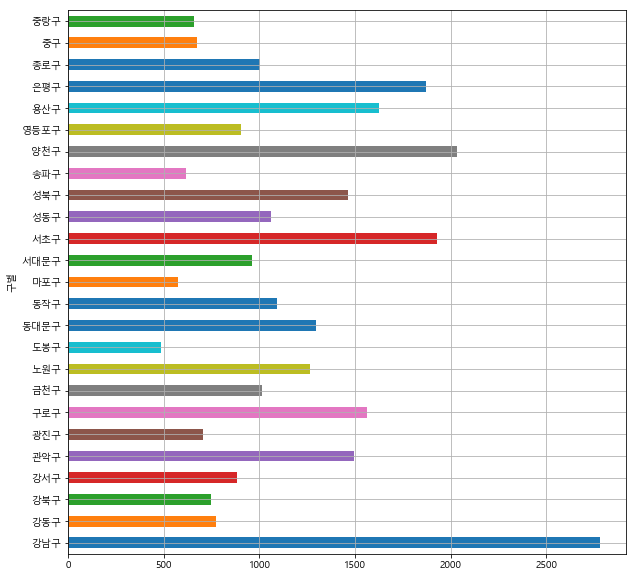

In [0]:
data_result
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()